Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

 Декомпозиция
 = 


 **1.  Пред обработка и иследование  данных**
 
 * Загрузка и первичное знакомство с данными
 * Поиск дубликатов
 * Проверка корректности данных
 

 **2.  Анализ событий**

 **3. Исследовательский анализ данных.**
 
 **4.Сегментация пользователей на основе данных о количестве потребляемых продуктов**

 **5.  Формулировка и проверка статистических гипотез.**
 
 1.  Проверка гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
 2.  Формулировка и проверка статистической гипотезы относительно представленных данных.
      
      
 **6.  Выводы и  и рекомендациями по удержанию клиентов**

<div class='alert alert-success'> 👍	
Здравствуй, Карина!

В целом получилось все корректно. Можещшь продолжать работу над проектом!

Презентация 
= 
- https://disk.yandex.ru/i/cDtkYQGGxDRs4g


Дашборд
=
https://public.tableau.com/app/profile/karish0k/viz/ZelenovaKY/Dashboard1

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно **обязательно** в формате **pdf**.

## Пред обработка и иследование  данных:

[bank_dataset.csv](https://disk.yandex.ru/d/JVAJ9uxtV1uydQ)

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

from sqlalchemy import create_engine

In [2]:
bank = pd.read_csv('/datasets/bank_dataset.csv')

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


<div class='alert alert-success'> 👍	
Хорошее первичное знакомство с данными


In [4]:
#Привду колонки в более удобный формат
bank.columns = [x.lower().replace(' ', '_') for x in bank.columns.values]

In [5]:
#Проверка
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
#Посчитаем уникальных пользователей
bank['userid'].value_counts()

15636869    1
15821488    1
15721121    1
15813284    1
15833766    1
           ..
15727981    1
15625583    1
15799584    1
15713650    1
15720675    1
Name: userid, Length: 10000, dtype: int64

Уникальных пользователей у нас 10 000

In [26]:
bank['balance'].value_counts()

105473.74    2
130170.82    2
109974.22    1
171653.17    1
108867.00    1
            ..
136525.99    1
130306.49    1
92895.56     1
132005.77    1
104001.38    1
Name: balance, Length: 6381, dtype: int64

In [14]:
bank['score'].value_counts()

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: score, Length: 460, dtype: int64

In [23]:
bank['age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: age, Length: 70, dtype: int64

In [24]:
bank['objects'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

In [62]:
bank['estimated_salary'].value_counts()   

24924.92     2
109145.20    1
59755.14     1
1557.82      1
117202.19    1
            ..
37674.47     1
158043.11    1
103792.53    1
182266.01    1
155061.97    1
Name: estimated_salary, Length: 9999, dtype: int64

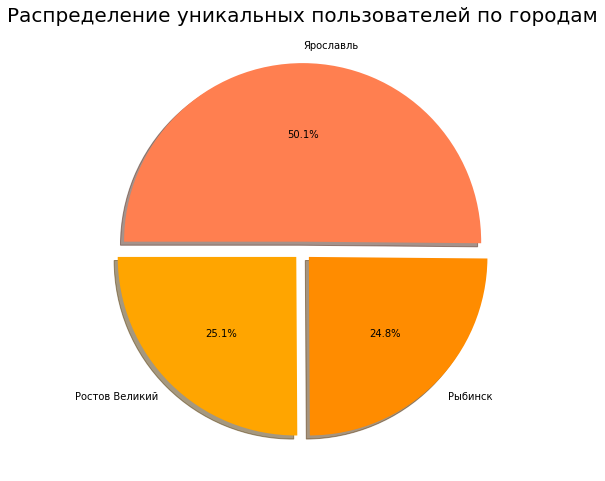

In [53]:
plt.figure(figsize=(8,10))
df = bank.groupby('city').size().reset_index(name='counts')
labels = df['city']
values = df['counts']
colors = ['#FFA500','#FF8C00','#FF7F50']
plt.title('Распределение уникальных пользователей по городам',fontsize=20)
explode = (0.05, 0.05, 0.05)
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%',startangle=180, explode=explode)
plt.show()

Половина пользователей из Ярославля

233 человека с максимальной оценкой кридито платежности

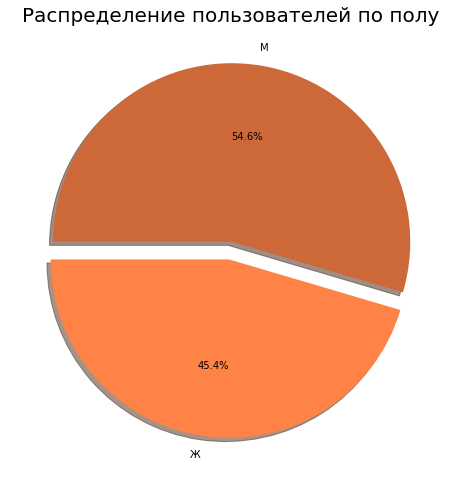

In [54]:
plt.figure(figsize=(8,10))
df = bank.groupby('gender').size().reset_index(name='counts')
labels = df['gender']
values = df['counts']
colors = ['#FF8247','#CD6839']
plt.title('Распределение пользователей по полу',fontsize=20)
explode = (0.05, 0.05)
plt.pie(values,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%',startangle=180, explode=explode)
plt.show()

Большинство пользователей - мужчины

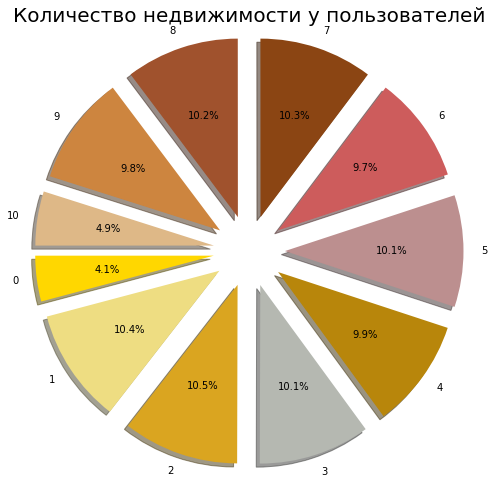

In [38]:
plt.figure(figsize=(8,10))
df = bank.groupby('objects').size().reset_index(name='counts')
labels = df['objects']
values = df['counts']
plt.title('Количество недвижимости у пользователей',fontsize=20)
colors = ['#FFD700','#EEDD82','#DAA520','#B5B8B1','#B8860B','#BC8F8F','#CD5C5C','#8B4513','#A0522D','#CD853F','#DEB887']
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)
plt.pie(values,labels=labels,shadow=True,autopct='%1.1f%%',startangle=180, colors=colors, explode=explode)
plt.show()

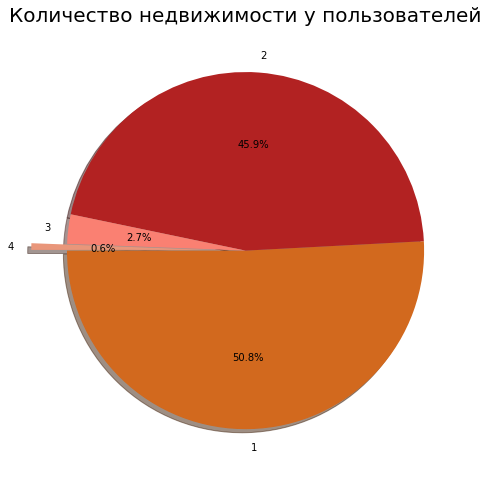

In [41]:
plt.figure(figsize=(8,10))
df = bank.groupby('products').size().reset_index(name='counts')
labels = df['products']
values = df['counts']
plt.title('Количество недвижимости у пользователей',fontsize=20)
colors = ['#D2691E','#B22222','#FA8072','#E9967A']
explode = (0, 0, 0, 0.2)
plt.pie(values,labels=labels,shadow=True,autopct='%1.1f%%',startangle=180, explode=explode, colors=colors)
plt.show()

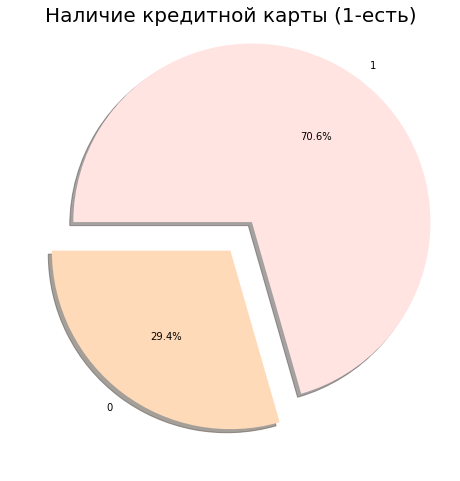

In [58]:
plt.figure(figsize=(8,10))
df = bank.groupby('creditcard').size().reset_index(name='counts')
labels = df['creditcard']
values = df['counts']
plt.title('Наличие кредитной карты (1-есть)',fontsize=20)
colors = ['#FFDAB9','#FFE4E1']
explode = (0, 0.2)
plt.pie(values,labels=labels,shadow=True,autopct='%1.1f%%',startangle=180, explode=explode, colors=colors)
plt.show()

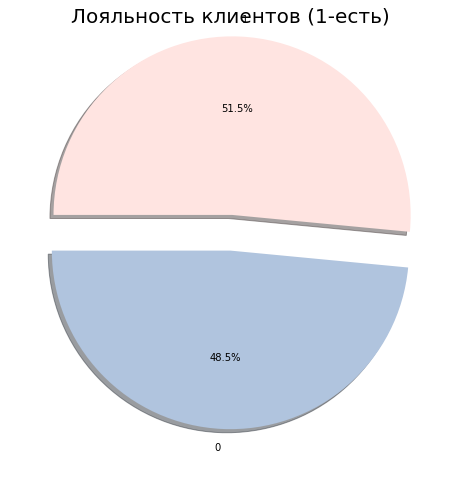

In [61]:
plt.figure(figsize=(8,10))
df = bank.groupby('loyalty').size().reset_index(name='counts')
labels = df['loyalty']
values = df['counts']
plt.title('Лояльность клиентов (1-есть)',fontsize=20)
colors = ['#B0C4DE','#FFE4E1']
explode = (0, 0.2)
plt.pie(values,labels=labels,shadow=True,autopct='%1.1f%%',startangle=180, explode=explode, colors=colors)
plt.show()

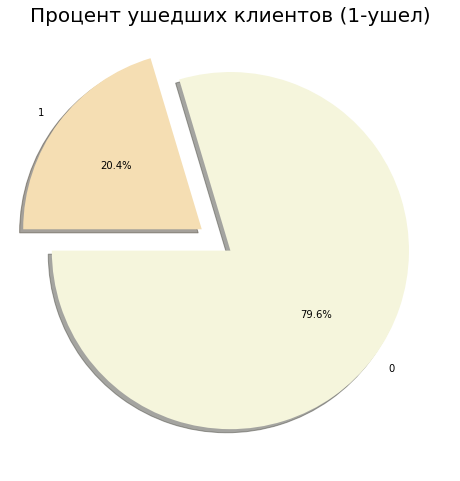

In [67]:
plt.figure(figsize=(8,10))
df = bank.groupby('churn').size().reset_index(name='counts')
labels = df['churn']
values = df['counts']
plt.title('Процент ушедших клиентов (1-ушел)',fontsize=20)
colors = ['#F5F5DC','#F5DEB3']
explode = (0, 0.2)
plt.pie(values,labels=labels,shadow=True,autopct='%1.1f%%',startangle=180, explode=explode, colors=colors)
plt.show()

In [70]:
#Проверим на наличие дубликатов
bank[bank.duplicated()]

Empty DataFrame
Columns: [userid, score, city, gender, age, objects, balance, products, creditcard, loyalty, estimated_salary, churn]
Index: []

дубликатов нет

In [71]:
for col in bank.columns:
    pct_missing = np.mean(bank[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

userid - 0%
score - 0%
city - 0%
gender - 0%
age - 0%
objects - 0%
balance - 36%
products - 0%
creditcard - 0%
loyalty - 0%
estimated_salary - 0%
churn - 0%


36% пропусков в пункте баланс, маловероятно, что у такого большого количества клиентов нет баланса. Предполагаю что это вызвано сбоем со стороны хранилища. Стоит зполнить данные медианами. Имеет смысл расчитаем медианый баланс по городу, полу и возврасту. Заполнение таким способом не изменит распределение баланса и средних.

In [72]:
bank_balance=bank.query('balance.isna()')
bank_balance

userid  score       city gender  age  objects  balance  products  \
0     15677338    619  Ярославль      Ж   42        2      NaN         1   
3     15744090    699  Ярославль      Ж   39        1      NaN         2   
6     15635267    822  Ярославль      М   50        7      NaN         2   
11    15779909    497    Рыбинск      М   24        3      NaN         2   
12    15675000    476  Ярославль      Ж   34       10      NaN         2   
...        ...    ...        ...    ...  ...      ...      ...       ...   
9989  15648358    841    Рыбинск      М   28        4      NaN         2   
9992  15699841    726    Рыбинск      М   36        2      NaN         1   
9994  15762030    800  Ярославль      Ж   29        2      NaN         2   
9995  15648965    771  Ярославль      М   39        5      NaN         2   
9997  15627268    709  Ярославль      Ж   36        7      NaN         1   

      creditcard  loyalty  estimated_salary  churn  
0              1        1         101348.88      1  
3              0        0          93826.63      0  
6              1        1          10062.80      0  
11             1        0          76390.01      0  
12             1        0          26260.98      0  
...          ...      ...               ...    ...  
9989           1        1         179436.60      0  
9992           1        0         195192.40      0  
9994           0        0         167773.55      0  
9995           1        0          96270.64      0  
9997           0        1          42085.58      1  

[3617 rows x 12 columns]

In [73]:
bank_balance.groupby(['creditcard','city'])['products'].agg({'count'})


count
creditcard city            
0          Рыбинск      347
           Ярославль    678
1          Рыбинск      852
           Ярославль   1740

In [74]:
bank_balance.groupby('creditcard').count()# групировка по кредитке с пропусками в поле баланс

userid  score  city  gender   age  objects  balance  products  \
creditcard                                                                  
0             1025   1025  1025    1025  1025     1025        0      1025   
1             2592   2592  2592    2592  2592     2592        0      2592   

            loyalty  estimated_salary  churn  
creditcard                                    
0              1025              1025   1025  
1              2592              2592   2592

In [75]:
bank_balance.groupby('city').count()# групировка по городу с пропусками в поле баланс

userid  score  gender   age  objects  balance  products  \
city                                                                 
Рыбинск      1199   1199    1199  1199     1199        0      1199   
Ярославль    2418   2418    2418  2418     2418        0      2418   

           creditcard  loyalty  estimated_salary  churn  
city                                                     
Рыбинск          1199     1199              1199   1199  
Ярославль        2418     2418              2418   2418

In [76]:
bank.groupby('city').count()# групировка по городу

userid  score  gender   age  objects  balance  products  \
city                                                                      
Ростов Великий    2509   2509    2509  2509     2509     2509      2509   
Рыбинск           2477   2477    2477  2477     2477     1278      2477   
Ярославль         5014   5014    5014  5014     5014     2596      5014   

                creditcard  loyalty  estimated_salary  churn  
city                                                          
Ростов Великий        2509     2509              2509   2509  
Рыбинск               2477     2477              2477   2477  
Ярославль             5014     5014              5014   5014

**Ростов Великий- передал данные без данных о балансе клиентов

In [77]:
medians=(bank.groupby(['city','gender','age'],as_index=False).agg({'balance':'median'})).rename(columns={'balance':'median_balance'})
bank=bank.merge(medians, on=['city','gender','age'])
bank.loc[bank['balance'].isna(), 'balance']=bank.loc[bank['balance'].isna(), 'median_balance']
bank=bank.drop('median_balance', axis=1)

In [78]:
print('Повторная проверка после заполнения:',bank['balance'].isna().sum())
(bank.isna().mean()*100).round(1)    

Повторная проверка после заполнения: 28


userid              0.0
score               0.0
city                0.0
gender              0.0
age                 0.0
objects             0.0
balance             0.3
products            0.0
creditcard          0.0
loyalty             0.0
estimated_salary    0.0
churn               0.0
dtype: float64

только у 28 пользователей или 0,3% пользователей не нашлось данных. Уберем их

<div class='alert alert-success'> 👍
Все ок, исследование пропусков проведено корректно

In [79]:
bank=bank.dropna()

In [80]:
bank=bank.drop_duplicates()
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            9972 non-null   int64  
 1   score             9972 non-null   int64  
 2   city              9972 non-null   object 
 3   gender            9972 non-null   object 
 4   age               9972 non-null   int64  
 5   objects           9972 non-null   int64  
 6   balance           9972 non-null   float64
 7   products          9972 non-null   int64  
 8   creditcard        9972 non-null   int64  
 9   loyalty           9972 non-null   int64  
 10  estimated_salary  9972 non-null   float64
 11  churn             9972 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1012.8+ KB


<p style="font-family: Arial; font-size:1.4em;color:gold;"> Кредитный рейтинг  </p>
— значимый инструмент оценки платёжеспособности клиента на основании данных кредитной истории. Он позволяет объективно оценить риски и правильно сформировать предложение для конкретного клиента. 
Расчет рейтинга заемщика может быть произведен по трем шкалам:

 - 1 1–900;
 
 - 2 1–1300;
 
 - 3 300–850.
 
 Мы имеем дело с 3м случаем

In [81]:
bank.describe()

userid        score          age      objects        balance  \
count  9.972000e+03  9972.000000  9972.000000  9972.000000    9972.000000   
mean   1.573360e+07   650.462896    38.829322     5.013438  119792.839466   
std    7.189594e+04    96.614884    10.322604     2.891828   24934.547569   
min    1.560844e+07   350.000000    18.000000     0.000000    3768.690000   
25%    1.567113e+07   584.000000    32.000000     3.000000  107719.165000   
50%    1.573341e+07   652.000000    37.000000     5.000000  119656.450000   
75%    1.579586e+07   717.000000    44.000000     7.250000  131394.560000   
max    1.585843e+07   850.000000    92.000000    10.000000  250898.090000   

          products   creditcard      loyalty  estimated_salary        churn  
count  9972.000000  9972.000000  9972.000000       9972.000000  9972.000000  
mean      1.529683     0.705275     0.514340     100107.398451     0.204172  
std       0.581896     0.455942     0.499819      57499.517203     0.403115  
min       1.000000     0.000000     0.000000         11.580000     0.000000  
25%       1.000000     0.000000     0.000000      51014.837500     0.000000  
50%       1.000000     1.000000     1.000000     100218.210000     0.000000  
75%       2.000000     1.000000     1.000000     149388.247500     0.000000  
max       4.000000     1.000000     1.000000     199992.480000     1.000000

##   Анализ событий

 1.  Исследовательский анализ данных.
 2.  Сегментация пользователей на основе данных о количестве потребляемых продуктов,

In [83]:
bank['products'].value_counts()   

1    5076
2    4570
3     266
4      60
Name: products, dtype: int64

In [84]:
bank.drop(['userid'], axis=1).groupby('products').mean()

score        age   objects        balance  creditcard  \
products                                                               
1         649.159574  39.632979  4.975374  119843.328747    0.703310   
2         652.006783  37.592560  5.052516  119724.864362    0.707221   
3         648.105263  43.195489  5.003759  119569.625639    0.714286   
4         653.583333  45.683333  5.300000  121688.464583    0.683333   

           loyalty  estimated_salary     churn  
products                                        
1         0.503940      99500.742640  0.277384  
2         0.531510     100475.002534  0.076149  
3         0.424812     104318.130564  0.827068  
4         0.483333     104763.723333  1.000000

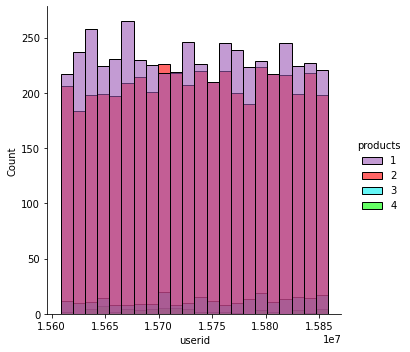

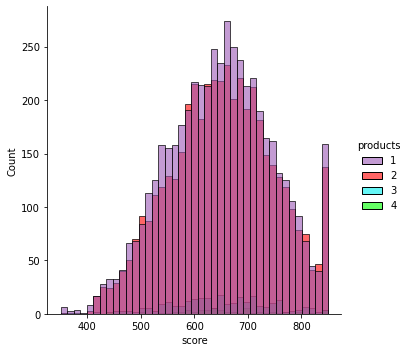

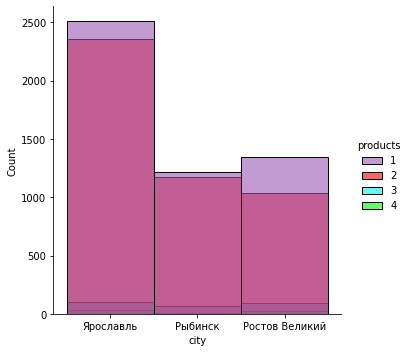

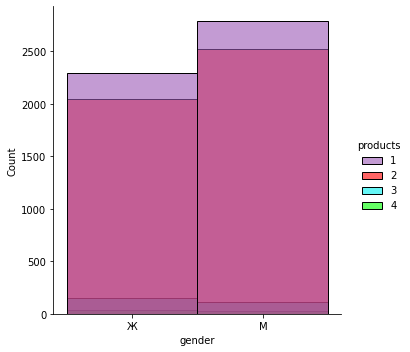

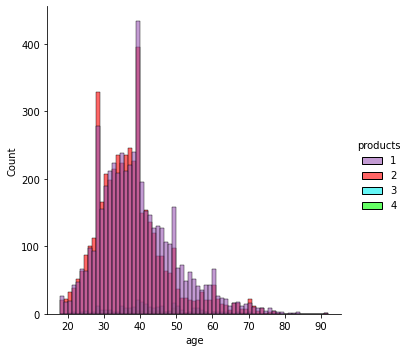

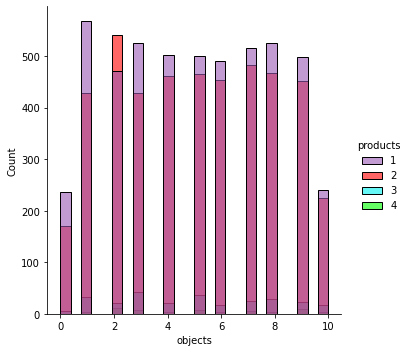

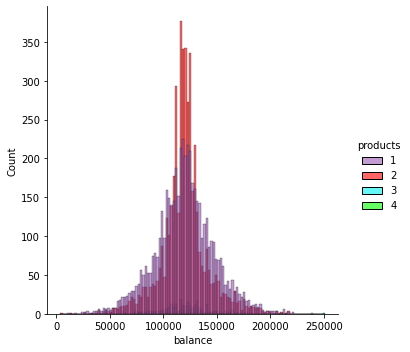

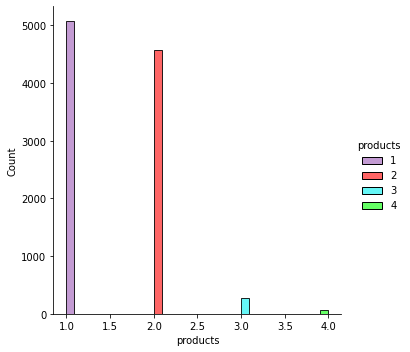

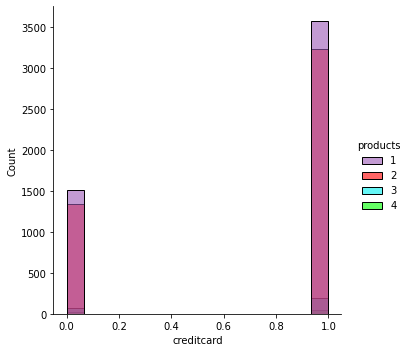

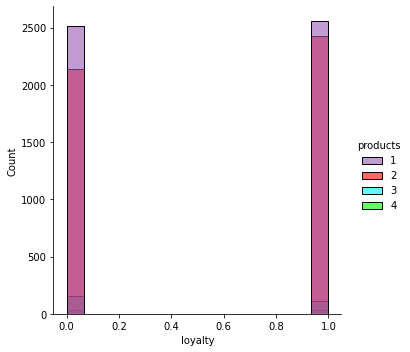

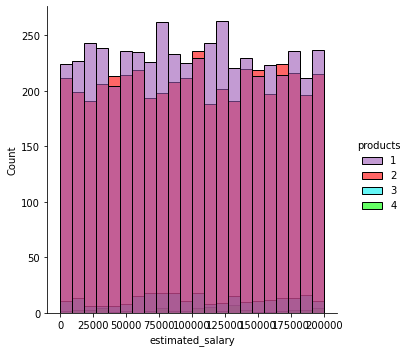

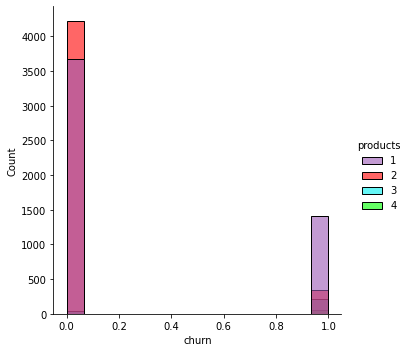

In [85]:
for column in bank.columns:
    sns.displot(bank,x=column,hue='products', palette=["#9b59b6", "#ff0000", "#00f0f0", "#00ff00"], alpha=0.6)

In [86]:
def hist_bank1(data,column):
    sns.displot(data,x=column,hue='products')
    plt.title('Гистограмма по распределению по '+name, fontsize=13)
    plt.xlabel(name)
    plt.ylabel('Распределение')
    plt.show()

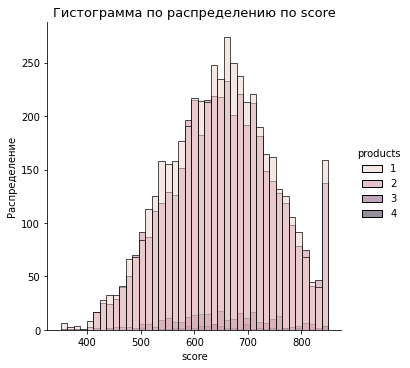

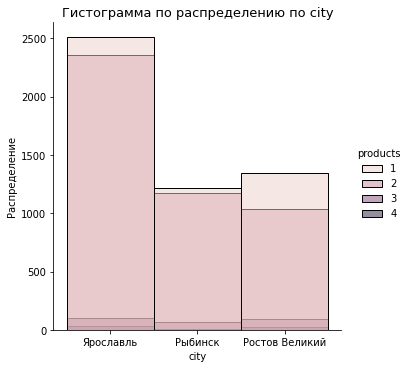

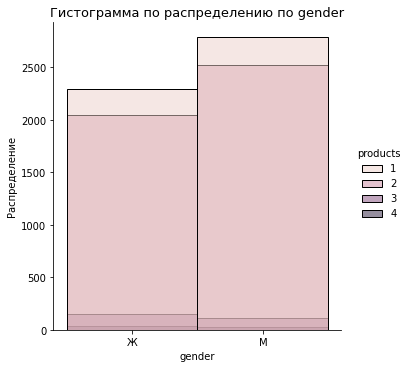

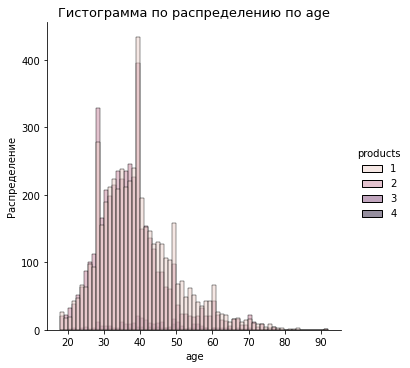

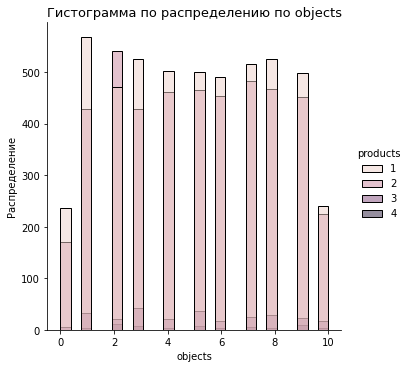

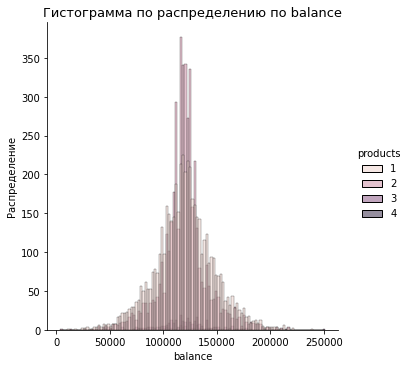

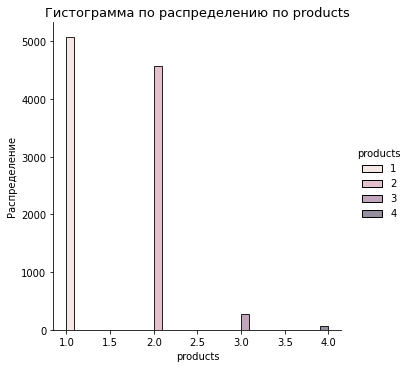

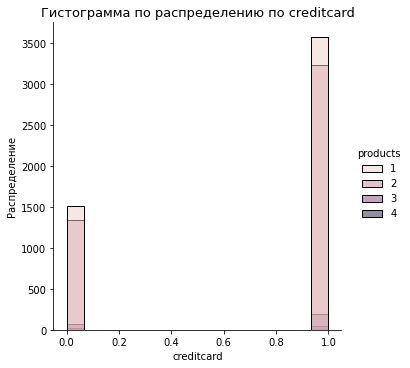

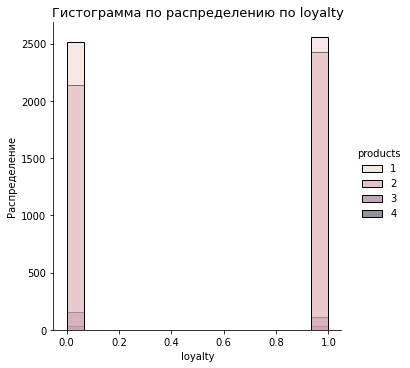

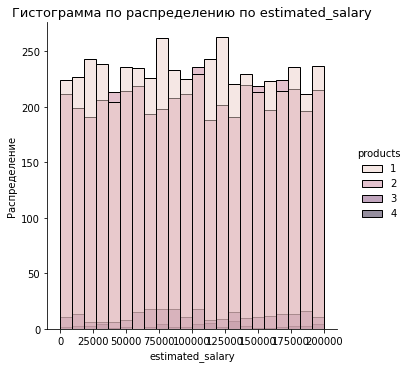

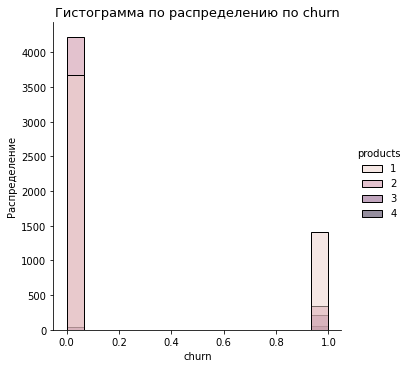

In [87]:
for name in bank.columns[1::]:
    hist_bank1(bank,name)

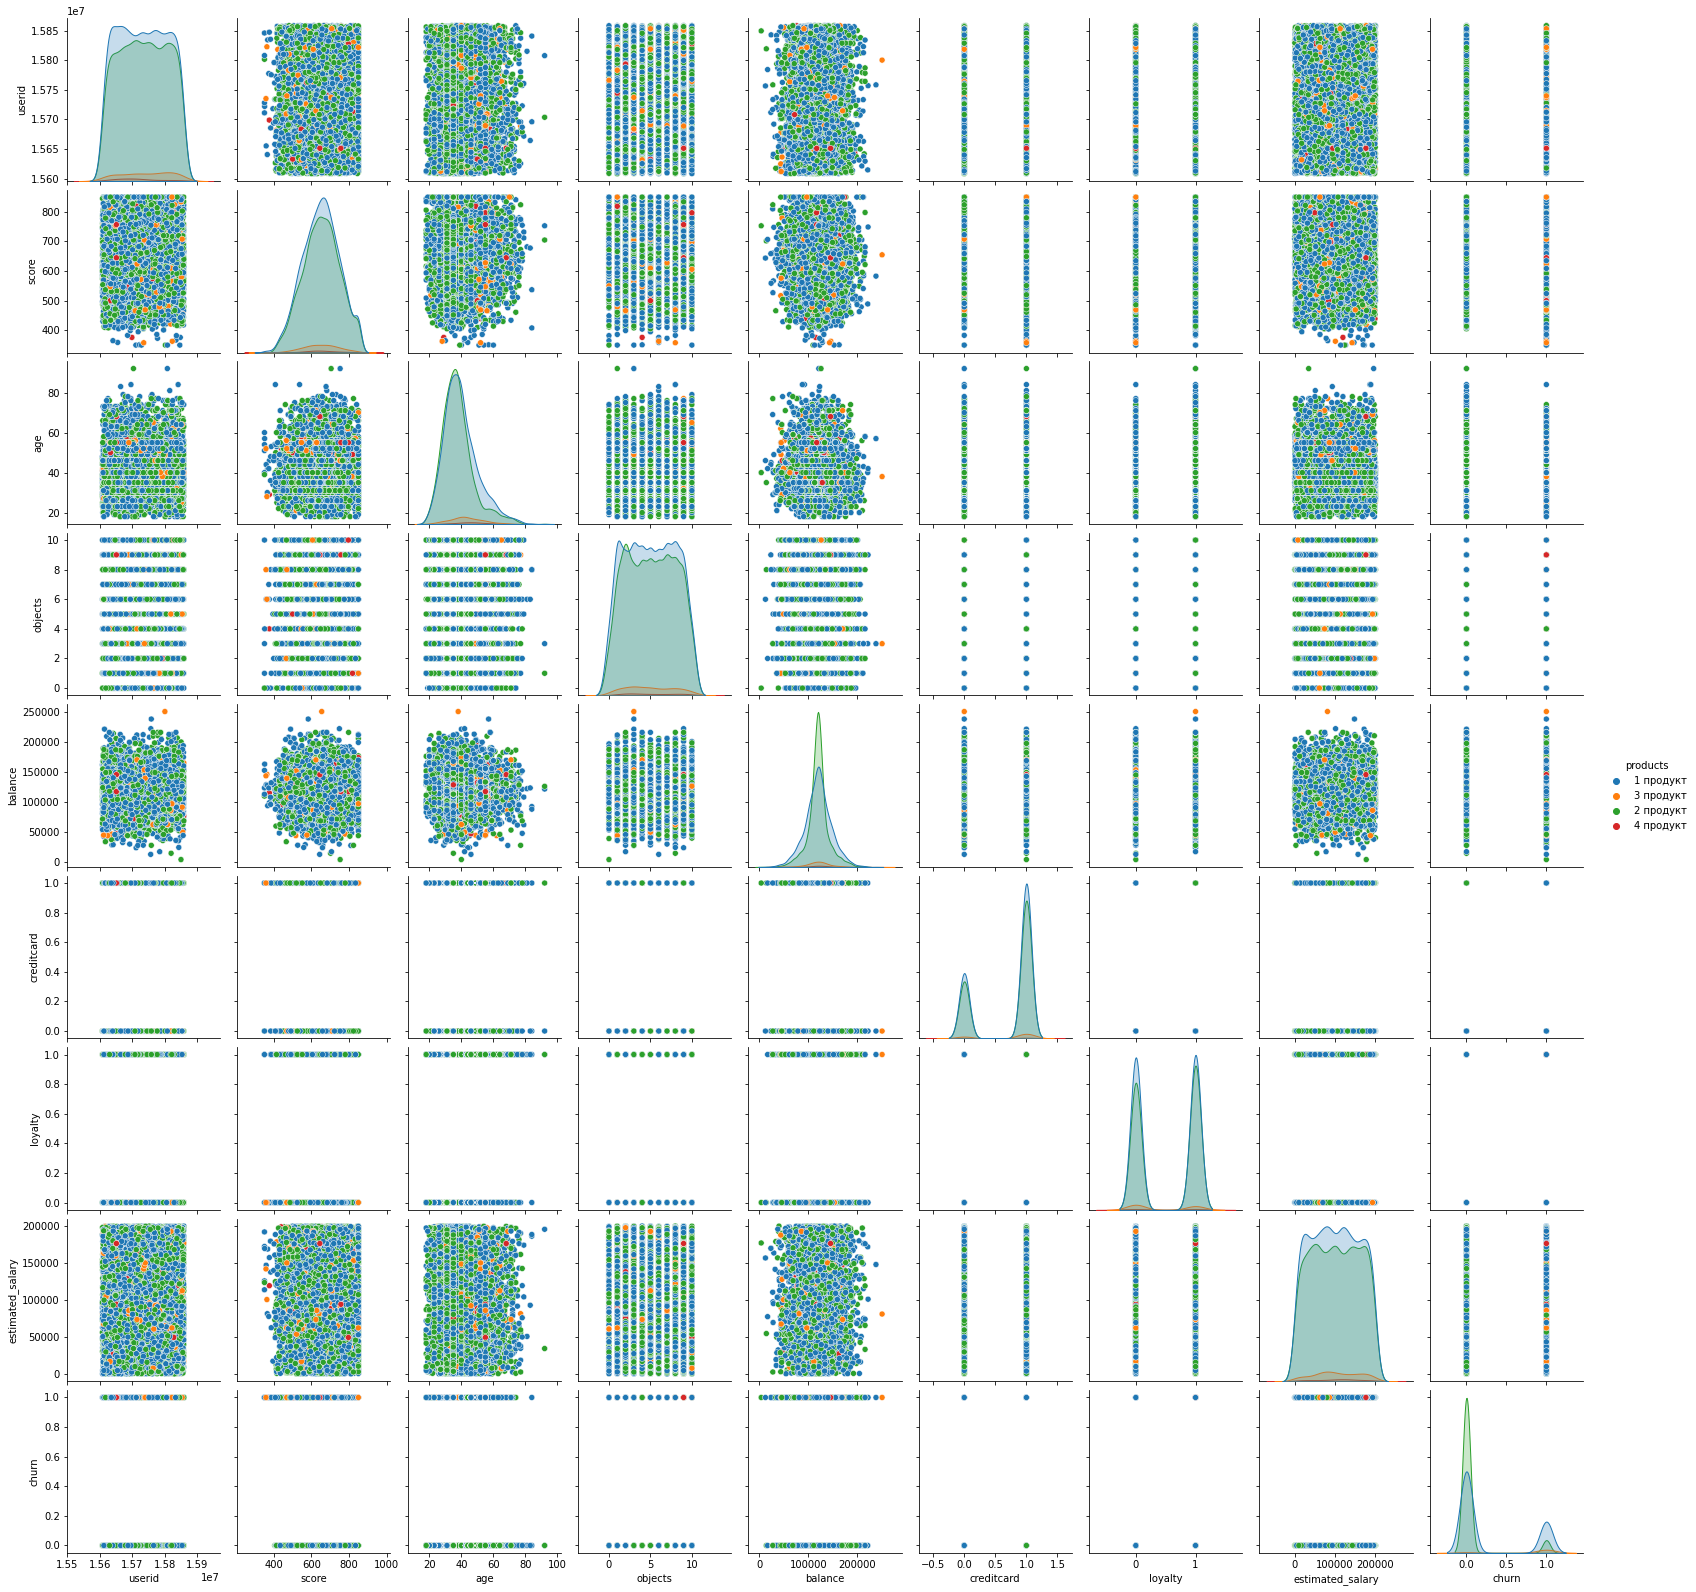

In [88]:
#список количественных переменных
list1=['score', 'balance', 'estimated_salary', 'salary', 'churn', 'loyalty']
#список категориальных пременных
list2=['city','gender', 'partner', 'gender','age', 'creditcard']
df1=bank
df1=df1.replace({'products':{1:'1 продукт', 2:'2 продукт', 3:'3 продукт', 4:'4 продукт'}})
sns.pairplot(df1, hue='products')
plt.show()

**Выводы:**
 * Большинство пользователей используют 1 продукт банка (5084). Чуть меньше клиентов используют 2 продукта (4590), за ними 3(266) и 4 (60).
 * У клиентов с высоким балом кредитного скоринга, большим количеством имущества (8-10), высокой лояльностью, зп. картина аналогична.
 * Люди старше 60 предпочитают подключать 2 услуги как и ушедшие клиенты
 * Люди с большим балансом имеют всего 1 продукт.
 * Люди со слабой лояльностью чаще уходят

Наиболее активные пользователи используют только 1 продукт

## Исследовательский анализ данных.

In [89]:
bank.query('products == 1').drop(['userid'], axis=1).describe() #Клиенты, 1 продукт

score          age      objects        balance  products  \
count  5076.000000  5076.000000  5076.000000    5076.000000    5076.0   
mean    649.159574    39.632979     4.975374  119843.328747       1.0   
std      97.171527    10.595168     2.915152   27474.202933       0.0   
min     350.000000    18.000000     0.000000   12459.190000       1.0   
25%     581.000000    32.000000     2.000000  103557.737500       1.0   
50%     651.000000    38.000000     5.000000  119870.925000       1.0   
75%     717.000000    45.000000     7.000000  135605.580000       1.0   
max     850.000000    92.000000    10.000000  238387.560000       1.0   

        creditcard      loyalty  estimated_salary        churn  
count  5076.000000  5076.000000       5076.000000  5076.000000  
mean      0.703310     0.503940      99500.742640     0.277384  
std       0.456844     0.500034      57350.474171     0.447752  
min       0.000000     0.000000         11.580000     0.000000  
25%       0.000000     0.000000      50414.515000     0.000000  
50%       1.000000     1.000000      99226.830000     0.000000  
75%       1.000000     1.000000     148212.695000     1.000000  
max       1.000000     1.000000     199970.740000     1.000000

In [90]:
bank.query('products == 2').drop(['userid'], axis=1).describe() #Клиенты, 2 продукт

score          age      objects        balance  products  \
count  4570.000000  4570.000000  4570.000000    4570.000000    4570.0   
mean    652.006783    37.592560     5.052516  119724.864362       2.0   
std      96.020775     9.829353     2.865917   21701.550820       0.0   
min     350.000000    18.000000     0.000000    3768.690000       2.0   
25%     586.000000    31.000000     3.000000  110717.380000       2.0   
50%     652.000000    36.000000     5.000000  119453.250000       2.0   
75%     718.750000    42.000000     7.000000  128544.567500       2.0   
max     850.000000    92.000000    10.000000  216109.880000       2.0   

        creditcard      loyalty  estimated_salary        churn  
count  4570.000000  4570.000000       4570.000000  4570.000000  
mean      0.707221     0.531510     100475.002534     0.076149  
std       0.455088     0.499061      57782.455254     0.265265  
min       0.000000     0.000000         90.070000     0.000000  
25%       0.000000     0.000000      50850.265000     0.000000  
50%       1.000000     1.000000     100780.010000     0.000000  
75%       1.000000     1.000000     150151.460000     0.000000  
max       1.000000     1.000000     199992.480000     1.000000

In [91]:
bank.query('products == 3').drop(['userid'], axis=1).describe() #Клиенты, 3 продукт

score         age     objects        balance  products  \
count  266.000000  266.000000  266.000000     266.000000     266.0   
mean   648.105263   43.195489    5.003759  119569.625639       3.0   
std     95.190396   10.422008    2.879332   26030.859651       0.0   
min    358.000000   21.000000    0.000000   43772.660000       3.0   
25%    586.000000   36.000000    3.000000  106929.292500       3.0   
50%    650.000000   42.000000    5.000000  120227.897500       3.0   
75%    711.000000   50.000000    8.000000  132550.356250       3.0   
max    850.000000   77.000000   10.000000  250898.090000       3.0   

       creditcard     loyalty  estimated_salary       churn  
count  266.000000  266.000000        266.000000  266.000000  
mean     0.714286    0.424812     104318.130564    0.827068  
std      0.452606    0.495246      55464.281426    0.378902  
min      0.000000    0.000000       3440.470000    0.000000  
25%      0.000000    0.000000      64344.800000    1.000000  
50%      1.000000    0.000000     101046.885000    1.000000  
75%      1.000000    1.000000     152230.195000    1.000000  
max      1.000000    1.000000     199357.240000    1.000000

In [92]:
bank.query('products == 4').drop(['userid'], axis=1).describe() #Клиенты, 4 продукт

score        age    objects        balance  products  creditcard  \
count   60.000000  60.000000  60.000000      60.000000      60.0   60.000000   
mean   653.583333  45.683333   5.300000  121688.464583       4.0    0.683333   
std    101.265600   8.619040   2.947564   25002.553724       0.0    0.469102   
min    376.000000  29.000000   1.000000   46870.430000       4.0    0.000000   
25%    595.000000  40.000000   2.750000  110730.172500       4.0    0.000000   
50%    643.000000  45.000000   5.000000  120968.270000       4.0    1.000000   
75%    708.000000  50.250000   8.000000  132502.802500       4.0    1.000000   
max    850.000000  68.000000  10.000000  195238.290000       4.0    1.000000   

         loyalty  estimated_salary  churn  
count  60.000000         60.000000   60.0  
mean    0.483333     104763.723333    1.0  
std     0.503939      57526.494114    0.0  
min     0.000000       5669.310000    1.0  
25%     0.000000      62033.390000    1.0  
50%     0.000000     112163.105000    1.0  
75%     1.000000     139371.955000    1.0  
max     1.000000     198874.520000    1.0

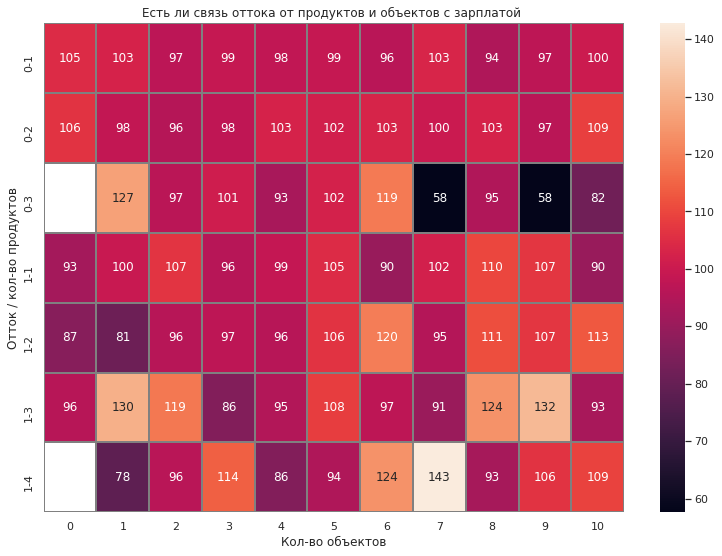

In [93]:
bank['salary']=round(bank['estimated_salary']/1000, 0)
bank_pivot = bank.pivot_table(
    index=['churn', 'products'], columns='objects', values='salary', aggfunc='mean'
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Есть ли связь оттока от продуктов и объектов с зарплатой ')
sns.heatmap(bank_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.xlabel("Кол-во объектов") 
plt.ylabel("Отток / кол-во продуктов"); 

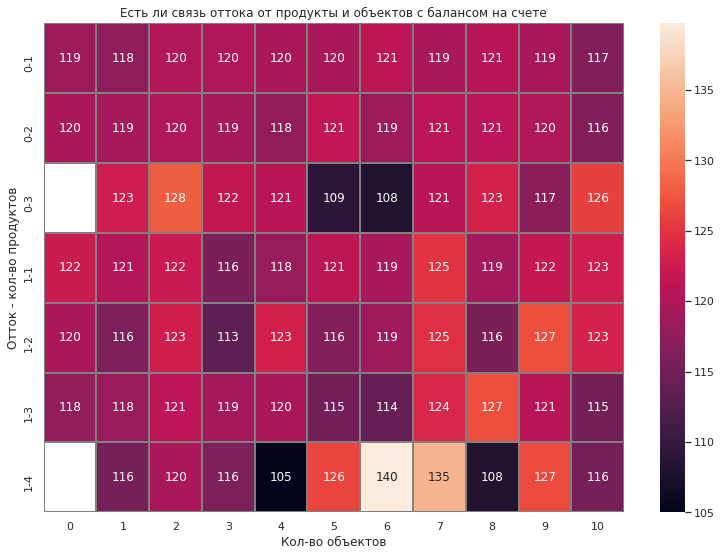

In [94]:
bank['balance']=round(bank['balance']/1000, 0)
bank_pivot = bank.pivot_table(
    index=['churn', 'products'], columns='objects', values='balance', aggfunc='mean'
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Есть ли связь оттока от продукты и объектов с балансом на счете')
sns.heatmap(bank_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.xlabel("Кол-во объектов") 
plt.ylabel("Отток - кол-во продуктов");

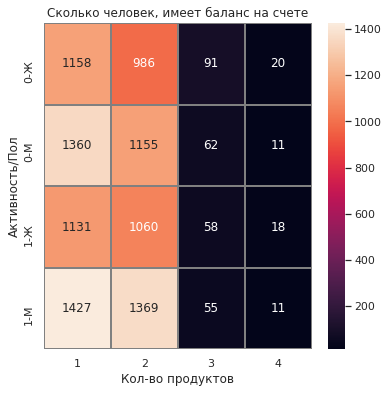

In [95]:
bank_pivot = bank.pivot_table(
    index=['loyalty', 'gender'], columns='products', values='balance', aggfunc='count'
)

sns.set(style='white')
plt.figure(figsize=(6, 6))
plt.title('Сколько человек, имеет баланс на счете')
sns.heatmap(bank_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.xlabel('Кол-во продуктов') 
plt.ylabel('Активность/Пол'); 

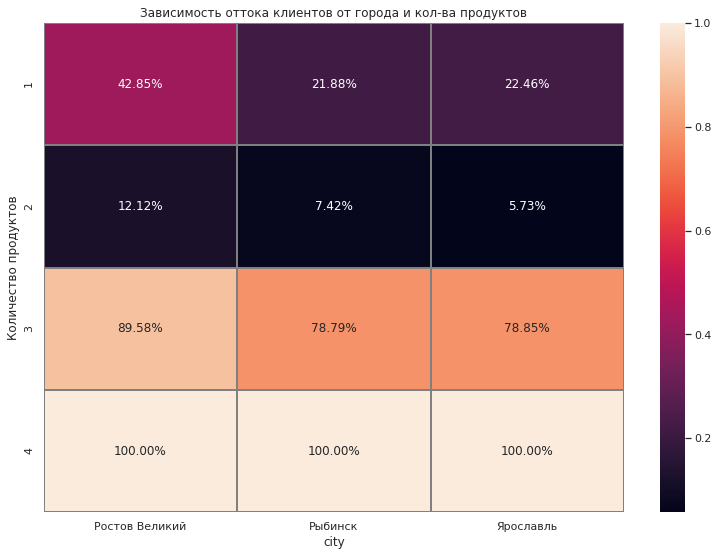

In [96]:
bank_pivot = bank.pivot_table(index=['products'], columns='city', values='churn', aggfunc='mean')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Зависимость оттока клиентов от города и кол-ва продуктов')
sns.heatmap(bank_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='gray')
plt.ylabel('Количество продуктов'); 

**Выводы:**
 * У клиентов с 3-4 продуктами есть собственность и они чаще уходят из банка.
 * Не попадают в отток клиенты с 3мя продуктами и с минимальным балансом на счету
 * Чем больше продуктов использует клиент тем меньше наличие баланса.
 * В Ростове Великом отток повышен.

## Сегментация пользователей на основе данных о количестве потребляемых продуктов

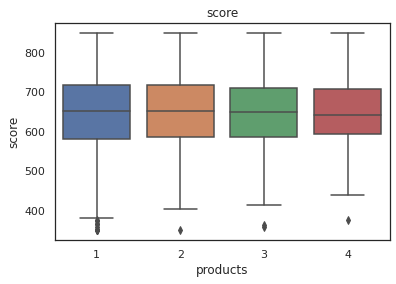

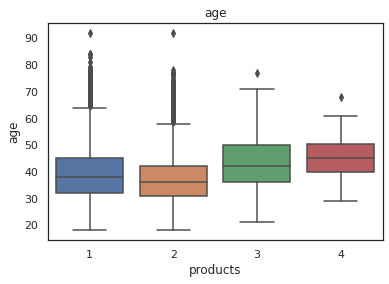

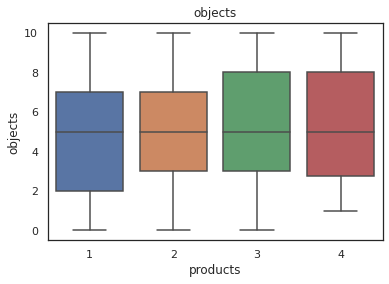

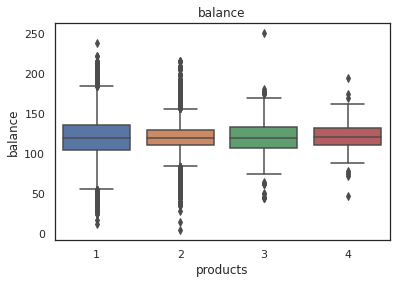

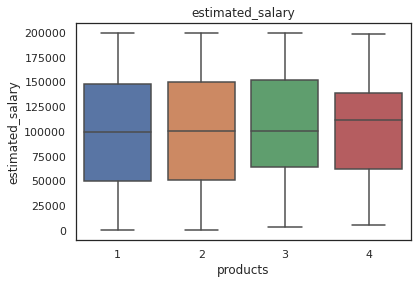

In [97]:
for i in ['score', 'age', 'objects', 'balance', 'estimated_salary']:
    sns.boxplot(x='products',y=i, data=bank).set_title(i)
    plt.show() 

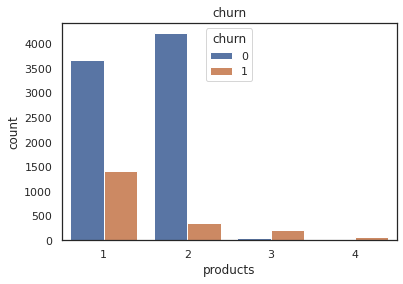

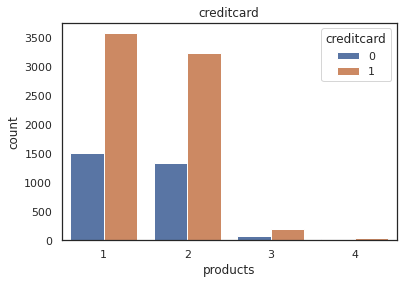

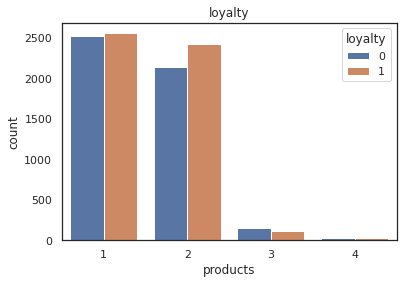

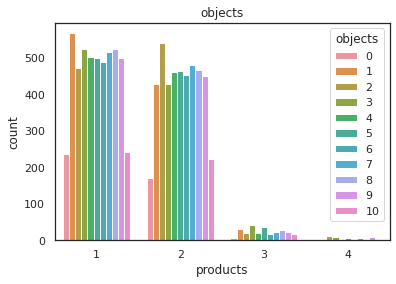

In [98]:
for i in ['churn', 'creditcard', 'loyalty', 'objects']:
    sns.countplot(x="products", hue=i, data=bank).set_title(i)
    plt.show()

<div class='alert alert-success'> 👍
Спасибо за автоматизацию отрисовки

<Figure size 720x720 with 0 Axes>

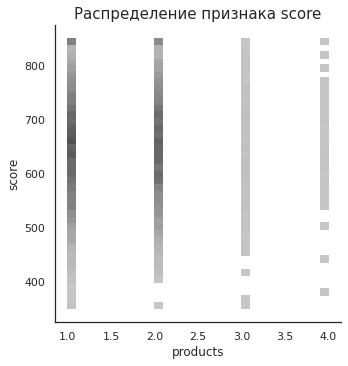

<Figure size 720x720 with 0 Axes>

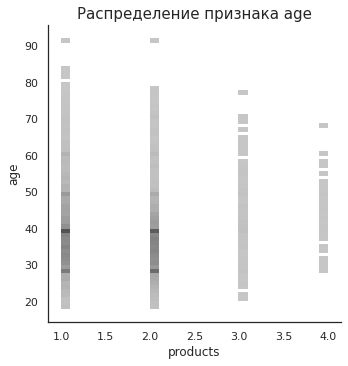

<Figure size 720x720 with 0 Axes>

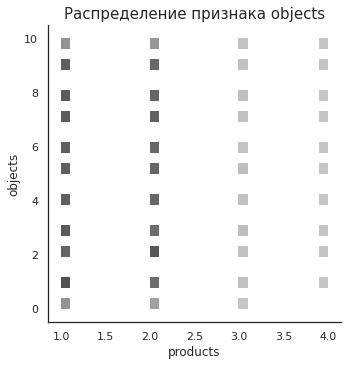

<Figure size 720x720 with 0 Axes>

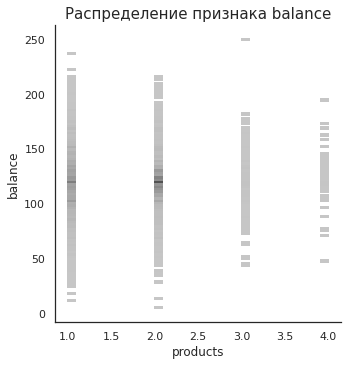

<Figure size 720x720 with 0 Axes>

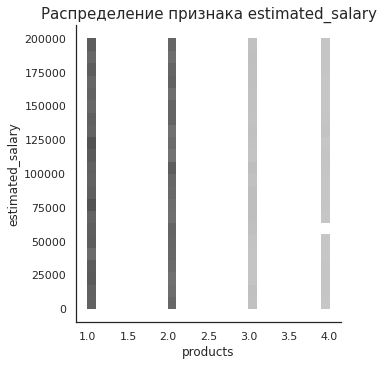

In [99]:
prod_num = ['score', 'age', 'objects', 'balance', 'estimated_salary']

for val,col in enumerate(prod_num):
    plt.figure(figsize=(10,10))
    sns.displot(x=bank['products'], y=bank[col], color='Gray')
    plt.title('Распределение признака '+ str(col), fontsize=15)
    plt.show()

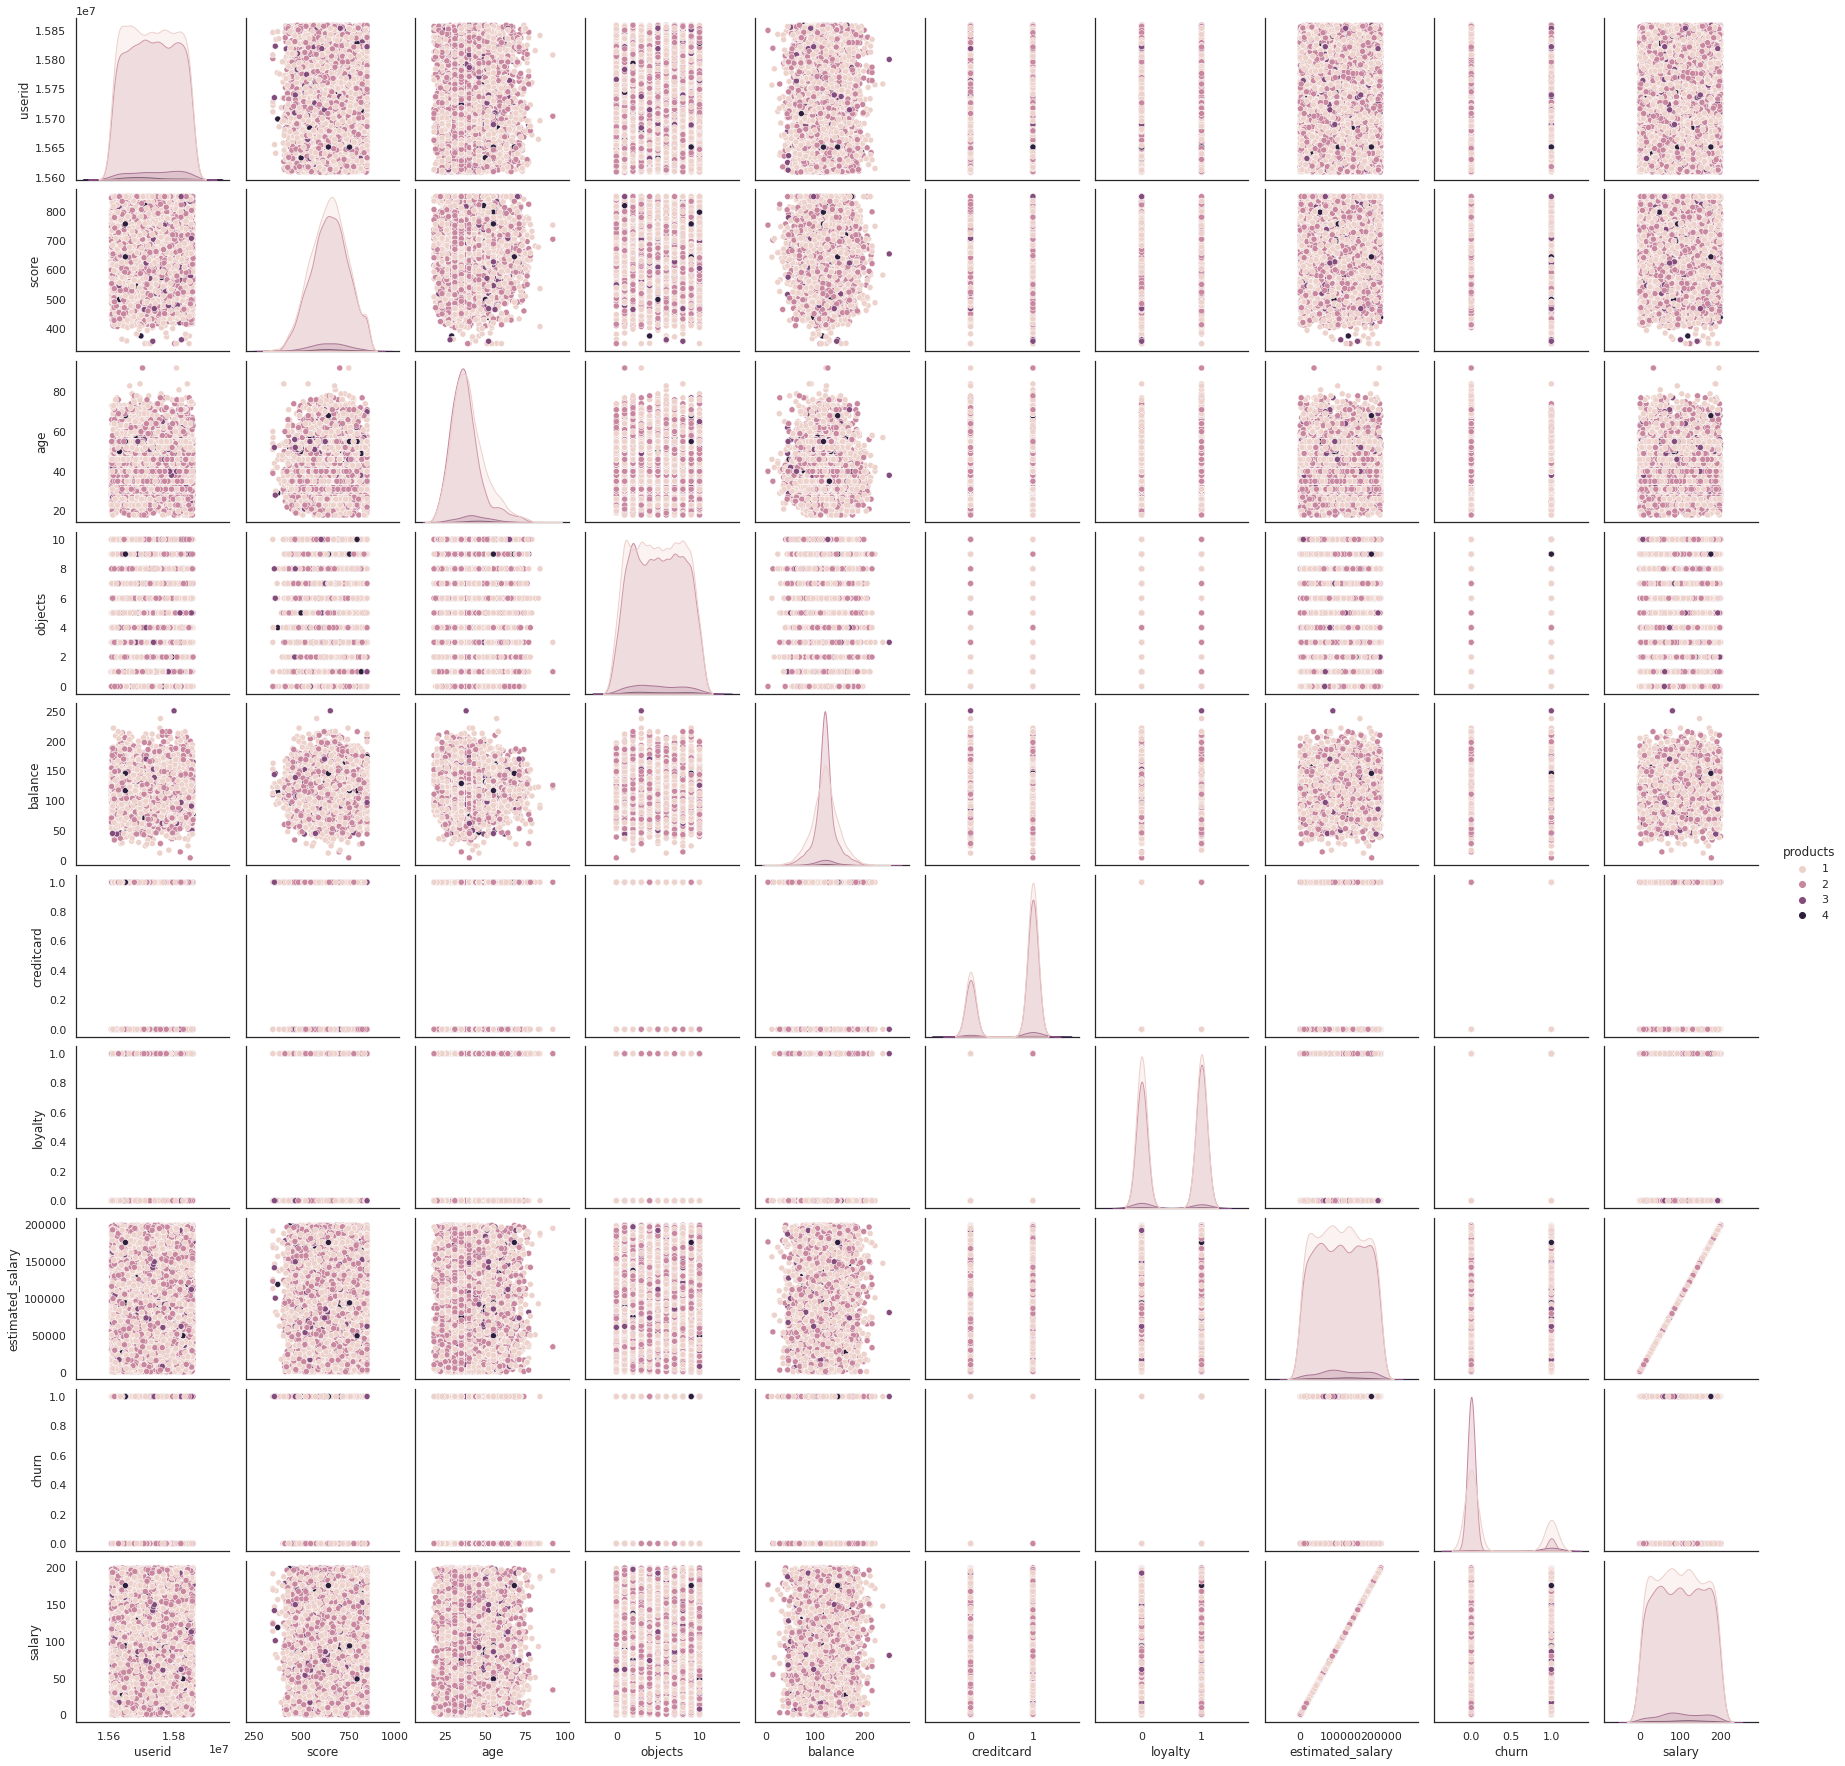

In [100]:
sns.pairplot(bank,hue='products')

**Выводы**
 * Люди по старше чаще пользуются большим количеством продуктов
 * Наблюдается прямая зависимость между количеством объектов недвижимости и продуктов
 * Чем ниже баланс на счету тем больше продуктов использует клиент, аналогично с зарплатой
 * Так же люди с большим количеством продуктов чаще уходят


 * Зачастую у пользователя с *1* продуктом имеет высокий кредитный бал 650-700, 35-40 лет, баланс выше 100 и зп от 50 000 до 180 000 и от 2 объектов
 * Пользователь с *2* продуктом имеет так же высокий кредитный бал, 35-40 лет, баланс выше 100 и зп от 50 000 до 180 000 и от 2 объектов
 * У большинства пользователей с *3* продуктами кредитный бал ниже(600-700), 40-50 лет, баланс выше 100, зп ниже 100, есть объекты недвижимости
 * У многих пользователей с *4* продуктами самый низкий кредитный бал, ближе к 50 годам, высокий баланс в банке, самая низкая зарплата

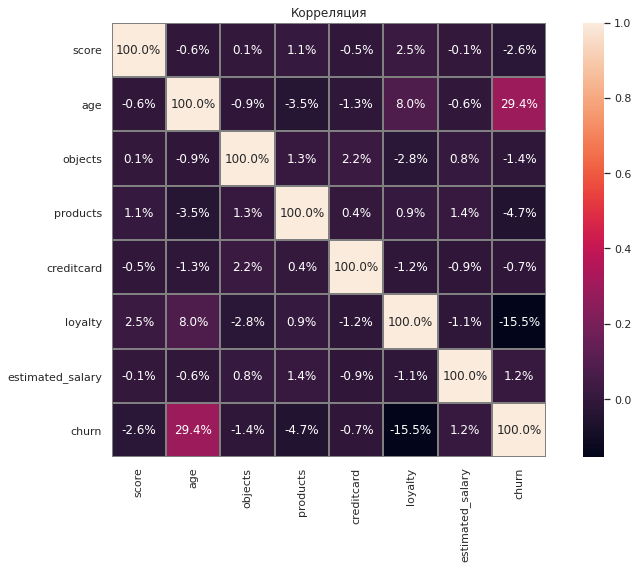

In [101]:
cm = bank.drop(['userid', 'salary', 'balance'], axis=1).corr() 

sns.set(style='white')
plt.figure(figsize=(13, 8))
plt.title('Корреляция')
sns.heatmap(cm, annot = True, square=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

In [102]:
data_group=bank.groupby('products',as_index=False).mean()
data_group

products        userid       score        age   objects     balance  \
0         1  1.573241e+07  649.159574  39.632979  4.975374  119.850276   
1         2  1.573463e+07  652.006783  37.592560  5.052516  119.737199   
2         3  1.574182e+07  648.105263  43.195489  5.003759  119.560150   
3         4  1.571936e+07  653.583333  45.683333  5.300000  121.650000   

   creditcard   loyalty  estimated_salary     churn      salary  
0    0.703310  0.503940      99500.742640  0.277384   99.505713  
1    0.707221  0.531510     100475.002534  0.076149  100.474179  
2    0.714286  0.424812     104318.130564  0.827068  104.334586  
3    0.683333  0.483333     104763.723333  1.000000  104.750000

<div class='alert alert-success'> 👍	
Круто что владеешь такой мощной техникой визуализации как тепловая карта. На ней прекрасно видно что особых корреляций между признаками нет. В такой ситуации стоит подумать о том, что возможно признаки имеют нелинейные связи. Для выявления таких нелинейных взаимосвязей я рекомендую дополнительно посмотреть на корреляцию Спирмена, а в идеале познакомиться с очень продвинутым коэффициентом корреляции Phik. С его помощью можно получать адекватные значения корреляции для данных любой природы. https://phik.readthedocs.io/en/latest/introduction.html

Самая сильная кореляция между возврастом клиента и шансом его ухода из банка. Более активные клиенты реже уходят из банка

##  Формулировка и проверка статистических гипотез.
### Гипотеза № 1
Сформулировать и проверить гипотезу – «О равенстве среднего дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

 * **Нулевая гипотеза** - "Различия дохода между теми клиентами, которые пользуются 1 продуктом банка, и теми, которые пользуются 2. *Не* является статистически значимой"
 * **Альтернативная** - "Различия дохода между теми клиентами, которые пользуются 1 продуктом банка, и теми, которые пользуются 2. *Является* статистически значимой"

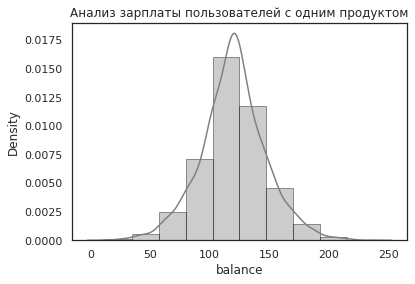

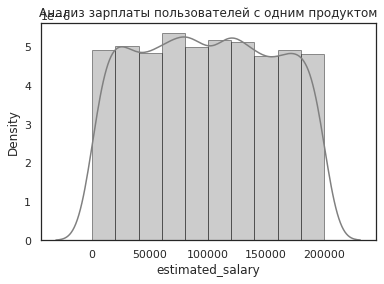

In [103]:
for i in ['balance', 'estimated_salary']:
    sns.distplot(bank.query('products == 1')[i], bins=10, color = 'gray',
                 hist_kws={'edgecolor':'black'}).set_title('Анализ зарплаты пользователей с одним продуктом')  
    plt.show() 

In [104]:
al = 0.05  

res = sps.shapiro(bank.query('products == 2')['estimated_salary'])
p_value = res[1] 

print('p_value: ', p_value)

if p_value < al:
    print('Отвергаем 0ю гипотезу')
else:
    print('Не получилось отвергнуть 0ю гипотезу') 

p_value:  2.618000119738009e-35
Отвергаем 0ю гипотезу


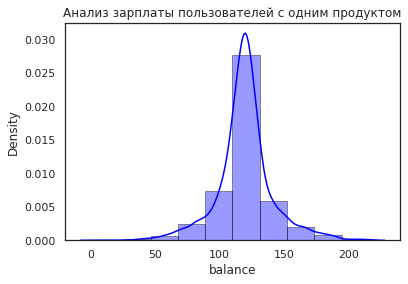

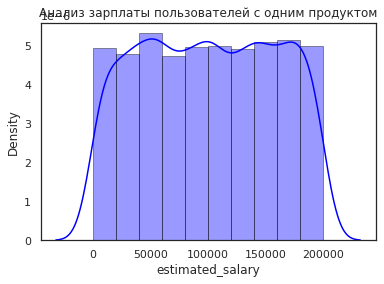

In [105]:
for i in ['balance', 'estimated_salary']:
    sns.distplot(bank.query('products == 2')[i], bins=10, color = 'blue',
                 hist_kws={'edgecolor':'black'}).set_title('Анализ зарплаты пользователей с одним продуктом')  
    plt.show() 

In [106]:
al = 0.05  

res = sps.shapiro(bank.query('products == 2')['estimated_salary'])
p_value = res[1] 

print('p-значение: ', p_value)

if p_value < al:
    print('Отвергаем 0ю гипотезу')
else:
    print('Не получилось отвергнуть 0ю гипотезу') 

p-значение:  2.618000119738009e-35
Отвергаем 0ю гипотезу


In [107]:
bank.query('products < 3').groupby('products')['estimated_salary'].mean()

products
1     99500.742640
2    100475.002534
Name: estimated_salary, dtype: float64

In [108]:
al = 0.05  

res = sps.mannwhitneyu(bank.query('products == 1')['estimated_salary'], bank.query('products == 2')['estimated_salary'])
p_value = res[1] 

print('p-значение: ', p_value)

if p_value < al:
    print('Отвергаем 0ю гипотезу')
else:
    print('Не получилось отвергнуть 0ю гипотезу') 

p-значение:  0.4033852286846179
Не получилось отвергнуть 0ю гипотезу


*Выводы:*
Найдено статестическое различие в среднем доходе. p_value гораздо больше 0,05. **Нулевая гипотеза**  подтверждена

<div class='alert alert-success'> 👍
Вот эта гипотеза проверена корректно

### Гипотеза № 2
Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.

 * **Нулевая гипотеза** - "Различия дохода между теми клиентами, которые пользуются 3-4 продуктами банка, и теми, которые пользуются 1-2. *Не* является статистически значимой"
 * **Альтернативная** - "Различия дохода между теми клиентами, которые пользуются 3-4 продуктами банка, и теми, которые пользуются 1-2. *Является* статистически значимой"

In [109]:
print(bank.query('products > 2')['estimated_salary'].mean())
bank.query('products < 3')['estimated_salary'].mean()

104400.14150306747


99962.31922247563

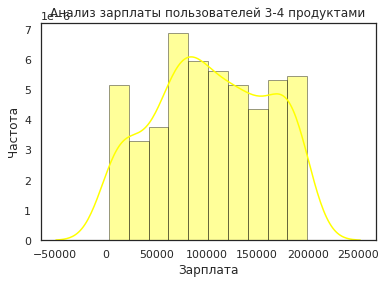

In [110]:

    sns.distplot(bank.query('products > 2')[i], bins=10, color = 'yellow',
                 hist_kws={'edgecolor':'black'}).set_title('Анализ зарплаты пользователей 3-4 продуктами')  
    plt.xlabel("Зарплата") 
    plt.ylabel("Частота");
    plt.show() 

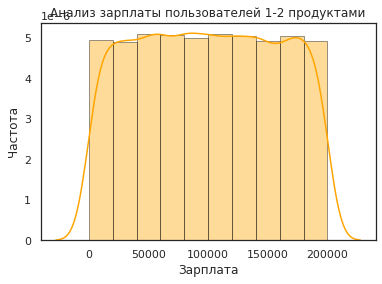

In [111]:
for i in ['estimated_salary']:
    sns.distplot(bank.query('products < 3')[i], bins=10, color = 'orange',
                 hist_kws={'edgecolor':'black'}).set_title('Анализ зарплаты пользователей 1-2 продуктами')  
    plt.xlabel("Зарплата") 
    plt.ylabel("Частота");
    plt.show() 

In [112]:
al = 0.05  

res = sps.mannwhitneyu(bank.query('products>2')['estimated_salary'], bank.query('products <3')['estimated_salary'])
p_value = res[1] 

print('p-значение: ', p_value)

if p_value < al:
    print('Отвергаем 0ю гипотезу')
else:
    print('Не получилось отвергнуть 0ю гипотезу') 

p-значение:  0.169585187147968
Не получилось отвергнуть 0ю гипотезу


 * 104400.14- средний доход клиентов с 3-4 продуктами
 * 99945.01 - средний доход клиентов с 1-2 продуктами
 

p_value больше 0.05 следовательно **Нуливая** гипотеза подтверждена

<div class='alert alert-success'> 👍
Вторая гипотеза проверена корректно.

### Выводы и  и рекомендациями по удержанию клиентов

**Вывод проекта**
= 
 1. Выполнено заполнение пропущенных данных balance по принадлежности пользователя к городу, полу и возрасту. Уменьшен регистр у названий столбцов.
 2. Были построины гистограммы гистограммы разбивки величин по продуктам, получены результаты:
      * Пользователи с 3 и 4 продуктами уходят чаще других, в то время как пользователи с 2 продуктами практически не уходят. 
      * баланс и кредитный бал распределен практически одинаково
      * женщины чаще мужчин используют 3/4 продукта, стоит проанализировать какой продукт привлекает женскую аудиторию и проверить возможность его распространение на мужчин
      * наибольшее количество клиентов в Ярославле, а наименьшее в Ростове Великом. Необходим обмен опытом между офисами
      * Ростов Великий передал данные с техническим повреждением, а именно не указан баланс клиентов


**рекомендации**
 =
 - cтоит рассмотреть стоимость предоставления дополнительных услуг и сравнить с конкурирующими банками.
 - женщины чаще мужчин используют 3/4 продукта, стоит проанализировать какой продукт привлекает женскую аудиторию и проверить возможность его распространение на мужчин
 - Проверить работу офиса в Ростове великом, так как данные переданы с ошибкой.
 

 3. Гипотезы
 - Гипотеза № 1 
     * **Нулевая гипотеза** - "Различия дохода между теми клиентами, которые пользуются 1 продуктом банка, и теми, которые пользуются 2. *Не* является статистически значимой"
     * **Альтернативная** - "Различия дохода между теми клиентами, которые пользуются 1 продуктом банка, и теми, которые пользуются 2. *Является* статистически значимой"
     * Найдено статистическое различие в среднем доходе. p_value гораздо больше 0,05. **Нулевая гипотеза**  подтверждена

 - Гипотеза № 2
     * **Нулевая гипотеза** - "Различия дохода между теми клиентами, которые пользуются 3-4 продуктами банка, и теми, которые пользуются 1-2. *Не* является статистически значимой"
     * **Альтернативная** - "Различия дохода между теми клиентами, которые пользуются 3-4 продуктами банка, и теми, которые пользуются 1-2. *Является* статистически значимой"
     * p_value больше 0.05 следовательно Нуливая гипотеза подтверждена
